In [77]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

penguins = sns.load_dataset("penguins")
titanic = sns.load_dataset("titanic")

In [67]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])
mpl.rcParams["axes.unicode_minus"] = False

Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
['Noto Sans KR']


In [95]:
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col = "ResponseId")
schema_raw = pd.read_csv('data/survey_results_schema.csv', index_col="qname")["question"]
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel', # 학력
    # 프로그래밍 경험
    'YearsCode', # 코딩 경험
    'YearsCodePro', # 코딩 경력
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]
survey_df = survey_raw_df[selected_columns].copy()
survey_df
mpl.rcParams["axes.facecolor"] = "white"
survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)

In [86]:
schema_raw.DevType

'Which of the following describes your current job? Please select all that apply.'

In [70]:
survey_df.DevType.count()

61302

In [71]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7142
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5301
Developer, front-end                                                                                                                            

### 연습문제
DevType column을 제일 작은 단위의 응답 항목으로 나누너 DataFrame 형태로 만들어 보도록 하겠습니다.

- NaN 값을 갖는 row는 모두 False값을 갖도록 처리한다.
- series를 인자로 받아옵니다.
- value의 구분자는 ';'입니다.
- series는 items() 메서드를 사용하여 루프할 수 있습니다.
- 반환 값으로 각 제일 작은 단위의 응답 항목을 column으로 갖는 DataFrame을 줍니다.
- 응답자가 제일 작은 단위의 기술 스택을 선택한 경우 해당 열의 값을 True로, 아닌 경우 False로 합니다.

In [96]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [36]:
def split_multicolumn_1(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn_1(survey_df['DevType'])

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
temp = []
for _, value in survey_df["DevType"].dropna().items():
    temp.extend(value.split(';'))
temp
result = list(set(temp))
result

['Cloud infrastructure engineer',
 'Developer, full-stack',
 'Engineer, site reliability',
 'Developer, mobile',
 'Developer, QA or test',
 'Developer, game or graphics',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, desktop or enterprise applications',
 'Developer, back-end',
 'Student',
 'Security professional',
 'Data or business analyst',
 'Designer',
 'System administrator',
 'Engineer, data',
 'Product manager',
 'Blockchain',
 'Database administrator',
 'Scientist',
 'Educator',
 'Marketing or sales professional',
 'Academic researcher',
 'Developer, embedded applications or devices',
 'Project manager',
 'Data scientist or machine learning specialist',
 'Other (please specify):',
 'DevOps specialist',
 'Developer, front-end',
 'Engineering manager']

In [40]:
result = set(temp)
result

{'Academic researcher',
 'Blockchain',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Other (please specify):',
 'Product manager',
 'Project manager',
 'Scientist',
 'Security professional',
 'Senior Executive (C-Suite, VP, etc.)',
 'Student',
 'System administrator'}

### 연습문제
각 역할별로 개수를 갖는 오른쪽과 같은 결과를 갖는 series를 만들어 보세요.
- 앞서 구한 데이터프레임을 활용하여 column 별 집계(sum)을 이용합니다.

In [97]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

### 연습문제
각 역할별로 퍼센트를 갖는 오른쪽과 같은 결과를 갖는 series를 만들어 보세요.
- 전체 합이 100이 되어야 합니다.
- devtype_percentage로 명명합니다.

In [98]:
devtype_percentage = dev_type_totals = dev_type_totals/dev_type_totals.sum() * 100
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

In [100]:
devtype_percentage.sum()

99.99999999999997

### 연습문제
각 역할별로 퍼센트를 갖는 오른쪽과 같은 결과를 갖는 그래프를 그려보세요.
- figsize: 12 x 12
- x label: Percentage
- y label: None

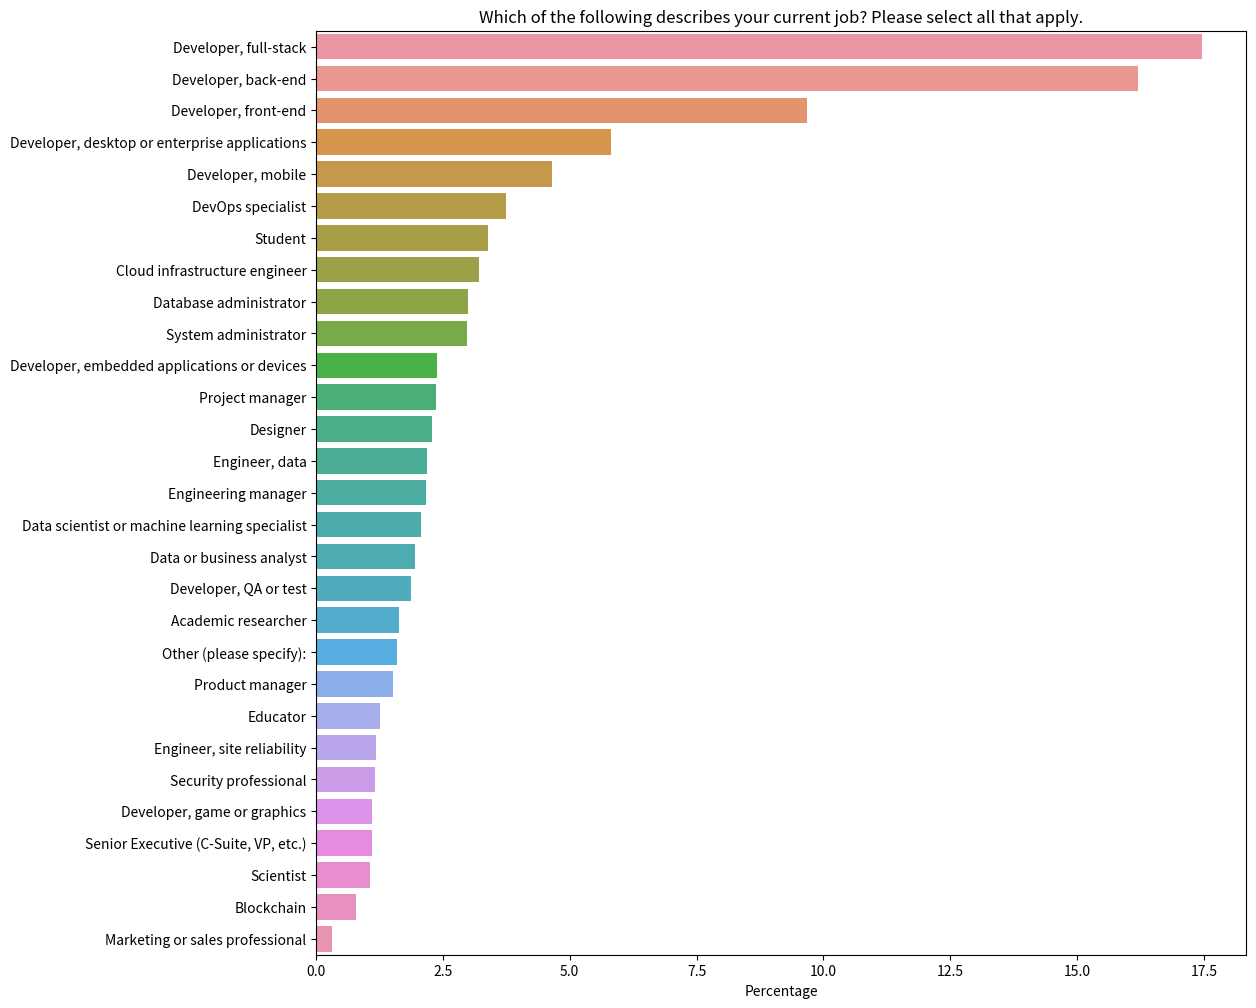

In [108]:
plt.figure(figsize=(12, 12))
sns.barplot(x=devtype_percentage, y=devtype_percentage.index)
plt.title(schema_raw["DevType"])
plt.xlabel("Percentage")
plt.show()